<a href="https://colab.research.google.com/github/sharon-kurant/Deep_Catalog/blob/main/Generic_T_SNE_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a generic T-SNE Generation notebook
In order to use it accordingly, please fill out the variables below

In [1]:
# path to directory of choice, directory structure can be like this:
#
# | - main dir:
# |   - dir a:
# |       > image11
# |       > image12
# |       > image13...
# |   - dir b:
# |       > image21
# |       > image22
# |       > image23...

main_dir_path = "/content/drive/MyDrive/SharonJecke/datasets/production"

## OPTIONAL if you want to save results:
## Very important
## This path should be to an empty folder, or a folder that content can be replaced
save_results_dir_path = "/content/drive/MyDrive/SharonJecke/datasets/test123"

### After running this notebook you will have a new directory in the path defined in `save_results_dir_path`, and a new csv file in the parent folder of `save_results_dir_path`

Run the code top to bottom, each step is necessary.<br>
Press shift+enter to run cell and hop to the next

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from sklearn.manifold import TSNE
from google.colab import drive
import pathlib
import matplotlib.image as mpimg
import pandas as pd
import os
import shutil
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is available


In [3]:
# Mount Personal drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Extract dataset from directory

In [4]:
img_height,img_width=1000,1000
batch_size=64

train_tsne = tf.keras.preprocessing.image_dataset_from_directory(
  main_dir_path,
  # validation_split=0.8,
  # subset="training",
  seed=123,
  shuffle=True,
  labels = None,
  image_size= (img_height,img_width),
  batch_size=batch_size,
  crop_to_aspect_ratio = True)

Found 3985 files belonging to 1 classes.
Using 797 files for training.


#### IMPORTANT:
##### A few **hundred** photos can take up to 10minutes approximately,
##### A few **thousand** photos can take up to 1hour approximately or more

In [5]:
images_amount = len(train_tsne.file_paths)
print(f'{images_amount=}')

images_amount=797


In [7]:
filenames = train_tsne.file_paths
jpg_names = [f.split('/')[-1] for f in filenames]

## Run Deep Neural Net to extract features

In [8]:
pretrained_model= tf.keras.applications.ResNet50(
                  include_top=False,
                  input_shape=(img_height,img_width,3),
                  pooling='avg',
                  weights='imagenet')
for layer in pretrained_model.layers:
  layer.trainable=False

In [9]:
features = pretrained_model.predict(train_tsne)

13/13 [==============================] - 78s 4s/step


## Run T-SNE model for feature reduction and clustering

In [10]:
tsne = TSNE(n_components=2, random_state=5, learning_rate = 'auto')
# fit and transform
tsne_tr = tsne.fit_transform(features)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


## Visualize clusters

Choose the files you wish to emphasize in the clusters:

In [ ]:
#################################################### comma separated files ################################################################
# files_to_emphasize = ["/content/drive/MyDrive/SharonJecke/Sinai/MFTN-0047-21to35/IL-MTFN-001-G-F-0047-21/IL-MTFN-001-G-F-0047-21_0001_0001.jpg",
#                       "/content/drive/MyDrive/SharonJecke/Sinai/MFTN-0047-21to35/IL-MTFN-001-G-F-0047-21/IL-MTFN-001-G-F-0047-21_0001_0002.jpg",
#                       "IL-MTFN-001-G-F-0047-21_0001_0003.jpg",
#                       "IL-MTFN-001-G-F-0047-21_0001_0004.jpg"]
###########################################################################################################################################

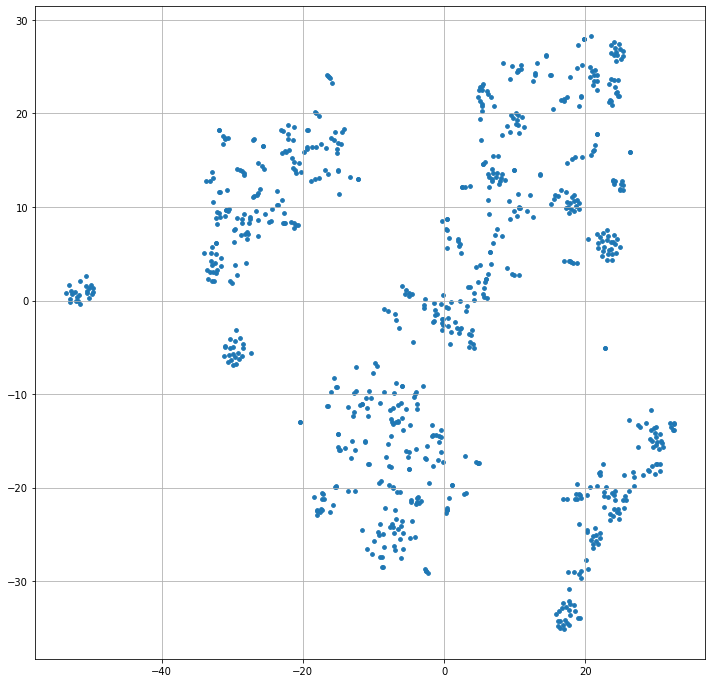

In [11]:
def visualize(files_to_emph=None):
  plt.rcParams["figure.figsize"] = [12, 12]
  fig, ax = plt.subplots()

  scatter = ax.scatter(tsne_tr[:,0], tsne_tr[:,1], s = 14)

  # file_coord_x = []
  # file_coord_y = []

  # if isinstance(files_to_emph, list):
  #   for f in files_to_emph:
  #     if f in filenames:
  #       index = filenames.index(f)
  #       file_coord_x.append(tsne_tr[index,0])
  #       file_coord_y.append(tsne_tr[index,1])
  #     elif f in jpg_names:
  #       index = jpg_names.index(f)
  #       file_coord_x.append(tsne_tr[index,0])
  #       file_coord_y.append(tsne_tr[index,1])
    
  #   scatter = ax.scatter(file_coord_x, file_coord_y, s = 25)

  ax.grid(True)
  plt.show()
  
visualize()

# **OPTIONAL**: If you want to investigate and save results

## Filter a rectangle from the graph

In [12]:
def get_rectangle(above = -1000,below= 1000,left_of = 1000,right_of= - 1000,samples = -1):
  pt_list = []
  for i, pt in enumerate(tsne_tr):
    if pt[0]>right_of and pt[0]<left_of and pt[1]>above and pt[1]<below: #and label[i] != 1:
      pt_list.append(i)
  
  if samples > 0:
    if samples > len(pt_list):
      return pt_list
    else:
      pt_list = random.sample(pt_list, samples)
  
  return pt_list

run this to make new filter:

In [13]:
# ******************************************************************** #
pt_list = get_rectangle(above=0, below=30, left_of=20, right_of=10)
# ******************************************************************** #

In [14]:
print(f"There are {len(pt_list)} images in the rectangle.\nindices of images: ",pt_list)

There are 77 images in the rectangle.
indices of images:  [10, 21, 26, 63, 77, 81, 116, 121, 137, 147, 171, 178, 180, 182, 185, 199, 208, 211, 230, 238, 252, 285, 293, 304, 312, 314, 331, 336, 341, 351, 363, 365, 375, 377, 394, 399, 423, 428, 448, 462, 465, 480, 495, 496, 512, 515, 531, 534, 551, 552, 556, 560, 566, 576, 592, 595, 602, 603, 617, 633, 651, 656, 657, 675, 688, 703, 721, 724, 728, 732, 734, 747, 749, 751, 752, 771, 790]


## Display images in the rectangle

10 /content/drive/MyDrive/SharonJecke/datasets/production/handwriting/IL-MTFN-001-G-F-0047-22_0001_0123.jpg
21 /content/drive/MyDrive/SharonJecke/datasets/production/handwriting/IL-MTFN-001-G-F-0047-12_0001_0125.jpg
26 /content/drive/MyDrive/SharonJecke/datasets/production/drawing/IL-MTFN-001-G-F-0390-28_0001_0068.jpg
63 /content/drive/MyDrive/SharonJecke/datasets/production/typewriter/IL-MTFN-001-G-F-0047-23_0001_0156.jpg
77 /content/drive/MyDrive/SharonJecke/datasets/production/handwriting/IL-MTFN-001-G-F-0104-11_0001_0051.jpg
81 /content/drive/MyDrive/SharonJecke/datasets/production/print/IL-MTFN-001-G-F-0079_0001_0128.jpg
116 /content/drive/MyDrive/SharonJecke/datasets/production/print/IL-MTFN-001-G-F-0079_0001_0062.jpg
121 /content/drive/MyDrive/SharonJecke/datasets/production/typewriter/IL-MTFN-001-G-F-0047-17_0001_0059.jpg
137 /content/drive/MyDrive/SharonJecke/datasets/production/photo/IL-MTFN-001-G-F-0047-29_0001_0247.jpg
147 /content/drive/MyDrive/SharonJecke/datasets/product

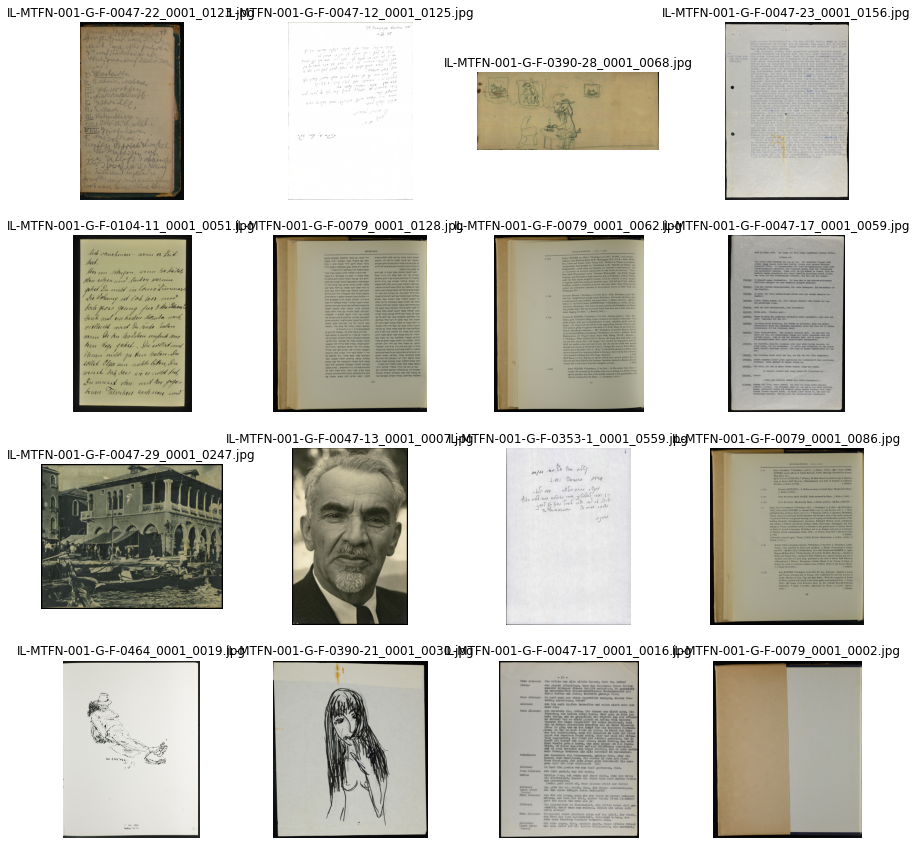

In [15]:
dist = 0
plt.figure(figsize=(15, 15))
for i in pt_list[:16]:
  ax = plt.subplot(4, 4, dist + 1)
  dist = dist + 1
  plt.imshow(mpimg.imread(filenames[i]))
  plt.title(train_tsne.file_paths[i].split('/')[-1])
  plt.axis("off")
  print(i,train_tsne.file_paths[i])

## Save results

In [16]:
paths = [train_tsne.file_paths[i] for i in pt_list]
labeled_df = pd.DataFrame(data = {"path":paths})
labeled_df

,path
0,/content/drive/MyDrive/SharonJecke/datasets/pr...
1,/content/drive/MyDrive/SharonJecke/datasets/pr...
2,/content/drive/MyDrive/SharonJecke/datasets/pr...
3,/content/drive/MyDrive/SharonJecke/datasets/pr...
4,/content/drive/MyDrive/SharonJecke/datasets/pr...
...,...
72,/content/drive/MyDrive/SharonJecke/datasets/pr...
73,/content/drive/MyDrive/SharonJecke/datasets/pr...
74,/content/drive/MyDrive/SharonJecke/datasets/pr...
75,/content/drive/MyDrive/SharonJecke/datasets/pr...


In [17]:
save_to_path = pathlib.Path(save_results_dir_path+'.csv')
labeled_df.to_csv(save_to_path)

## save to images folder
Use these cells only when you ar certain that you gave a new **empty** directory

In [18]:
paths = [train_tsne.file_paths[i] for i in pt_list]

In [20]:
new_dir = save_results_dir_path
pathlib.Path(new_dir).mkdir(parents=True, exist_ok=True)

for p in paths:
  jpg = p.split("/")[-1]
  source_path = pathlib.Path(p)
  destination_path = os.path.join(new_dir, jpg)
  # print(destination_path)
  shutil.copy(source_path, destination_path)